In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Générer les données #

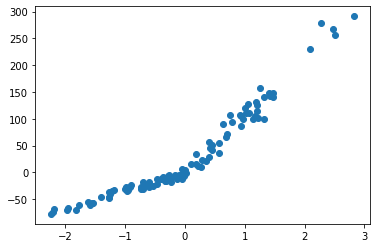

In [2]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 10)
y = y + abs(y/2)


plt.scatter(x, y)

In [19]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [20]:
# matrice X
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X[:10]

array([[ 0.20029629,  0.44754473,  1.        ],
       [ 1.39507708,  1.18113381,  1.        ],
       [ 0.13092751,  0.36183907,  1.        ],
       [ 0.08437512,  0.29047396,  1.        ],
       [ 0.41748466, -0.64613052,  1.        ],
       [ 0.87765818,  0.93683413,  1.        ],
       [ 0.53513717, -0.7315307 ,  1.        ],
       [ 1.444959  ,  1.20206447,  1.        ],
       [ 0.07727112,  0.27797683,  1.        ],
       [ 1.28456255,  1.13338544,  1.        ]])

In [21]:
theta = np.random.randn(3, 1)
theta

array([[-2.239882  ],
       [ 2.03855735],
       [-0.37360082]])

# 2. Définition du modèle #

In [22]:
def model(X,theta):
    return X.dot(theta)

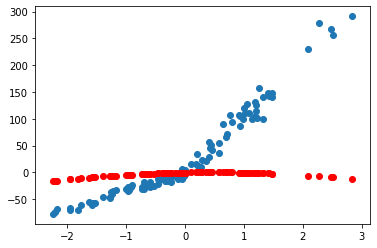

In [23]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c = 'r')

# 3. Fonction coût #

In [24]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [25]:
cost_function(X, y, theta)

4002.910888176835

# 4. Descente de gradient #

In [26]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [27]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# 5. Entraînement #

In [28]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [29]:
theta_final

array([[14.52005803],
       [68.65000027],
       [13.20567815]])

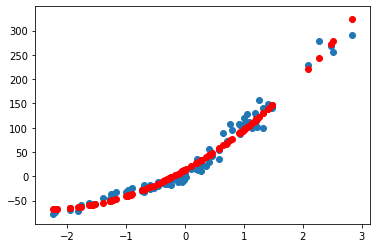

In [30]:
predictions = model(X, theta_final)
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], predictions, c = 'r')

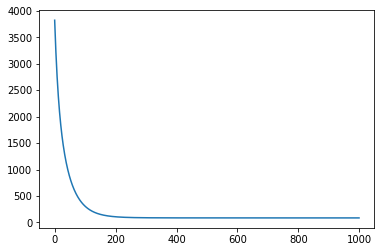

In [31]:
plt.plot(range(1000), cost_history)

In [32]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [33]:
coef_determination(y, predictions)

0.9756299517825074